--- ROCKET SPECS ---
Name: Sijeel
Rocket Length: 5 m
Rocket Diameter: 1 m
Empty Rocket Mass: 3129.6821268527897 kg
Rocket Cost: $10545534.39
Propellant Used: UDMH
Propellant Mass: 385.9996353649439 kg
Propellant Burn Rate: 70.84640499695384 kg/s
Burn Time: 5.448401162790697 s
Center of Gravity: (0.5 m, 4.0871728205300375 m)
--------------------
 
--- LAUNCH PREP ---
Launch Angle: 10 Degrees
Atmospheric Density at Launch: 1.0088950807649093 kg/m^3
Gravitational Constant at Launch: 9.81625 m/s^2
--------------------
Burn Time: 5.448401162790697 s


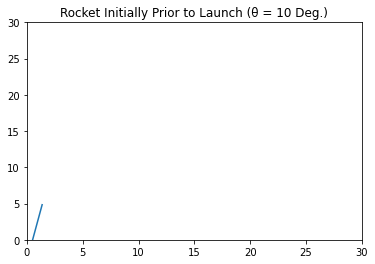

Rho: 1.0088950807649093, Time: 0.1 s
Rho: 1.2267528693744176, Time: 0.2 s
Rho: 1.226675897386443, Time: 0.30000000000000004 s
Rho: 1.2265912322059518, Time: 0.4 s
Rho: 1.2264981056752677, Time: 0.5 s
Rho: 1.2263956727443703, Time: 0.6000000000000001 s
Rho: 1.2262830040859958, Time: 0.7000000000000001 s
Rho: 1.2261590777157292, Time: 0.8 s
Rho: 1.2260227697841102, Time: 0.9 s
Rho: 1.2258728444601006, Time: 1.0 s
Rho: 1.2257079428175615, Time: 1.1 s
Rho: 1.2255265706281446, Time: 1.2000000000000002 s
Rho: 1.2253270849549327, Time: 1.3 s
Rho: 1.225107679431431, Time: 1.4000000000000001 s
Rho: 1.2248663680998613, Time: 1.5 s
Rho: 1.224600967671291, Time: 1.6 s
Rho: 1.2243090780577244, Time: 1.7000000000000002 s
Rho: 1.2239880610129745, Time: 1.8 s
Rho: 1.2236350167048289, Time: 1.9000000000000001 s
Rho: 1.2232467580256896, Time: 2.0 s
Rho: 1.2228197824325449, Time: 2.1 s
Rho: 1.2223502410897247, Time: 2.2 s
Rho: 1.2218339050695597, Time: 2.3000000000000003 s
Rho: 1.2212661283467199, Time: 

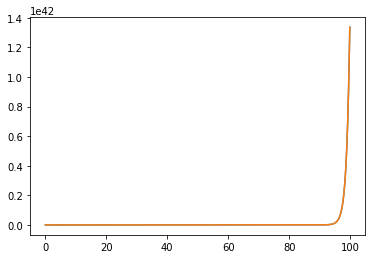

Accelerations
[[6.01875878e+00 2.43178273e+01]
 [1.10247775e+00 6.52138733e+00]
 [1.21332726e+00 7.17595545e+00]
 ...
 [1.86988030e+41 1.10392439e+42]
 [2.05686833e+41 1.21431683e+42]
 [2.26255516e+41 1.33574852e+42]]
Positions
[[6.01875878e+00 2.43178273e+01]
 [1.10247775e+00 6.52138733e+00]
 [1.21332726e+00 7.17595545e+00]
 ...
 [1.86988030e+41 1.10392439e+42]
 [2.05686833e+41 1.21431683e+42]
 [2.26255516e+41 1.33574852e+42]]
Times
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math, sympy
import os
from dotenv import load_dotenv

load_dotenv()

empty_rocket_mass_css = int(os.getenv("ROCKET_MASS")) - int(os.getenv("PROP_MASS"))
propellant_mass_css = int(os.getenv("PROP_MASS"))
rocket_length_css = float(os.getenv("ROCKET_LENGTH"))
diameter_css = float(os.getenv("DIAMETER"))


class Propellants:
    def __init__(self, name, isp, density, cost, exhaust_velocity):
        self.name = name
        self.isp = isp # s
        self.density = density # g/cc
        self.cost = cost # $/kg
        self.velocity = exhaust_velocity # m/s

    def set_burn_rate(self, diameter):
        nozzle_area = math.pi * (1/300*diameter*100)**2 # m^2
        self.burn_rate = nozzle_area*self.velocity*100*self.density/1000 # kg/s


class Materials:
    def __init__(self, name, density, cost):
        self.name = name
        self.density = density # g/cc
        self.cost = cost # $/kg

UDMH = Propellants('UDMH', 333, 1.18, 1.00, 1720)
LOX_RP1 = Propellants('LOX/RP-1', 353, 1.02, 1.17, 1805)
LOX_LH2 = Propellants('LOX/LH2', 451, 0.28, 1.09, 1435)

titanium = Materials('Titanium', 4.5, 14.90)
aluminum = Materials('Aluminum', 2.7, 3.05)

class Rocket:
    def __init__(self, name, rocket_length, diameter, material, propellant, empty_rocket_mass = 0, propellant_mass=0, propellant_to_rocket_ratio=0):
        self.name = name
        self.propellant = propellant
        self.material = material
        self.rocket_length = rocket_length
        self.diameter = diameter
        self.fin_height = 1.25*self.diameter
        fin_a = 1/6*rocket_length
        fin_b = 1/6*rocket_length*0.45
        self.fin_volume = 0.01*self.diameter*(fin_a+fin_b)/2*1.05*self.diameter
        self.body_volume = (math.pi*(1/2*self.diameter)**2*0.85*self.rocket_length) - (math.pi*(1/2*self.diameter)**2*0.85*self.rocket_length*0.99)
        self.nose_cone_volume = (1/3*math.pi*(1/2*self.diameter)**2*0.15*self.rocket_length) - (1/3*math.pi*(1/2*self.diameter)**2*0.15*self.rocket_length*0.99)
        self.fin_mass = self.fin_volume * 1000 * material.density
        self.body_mass = self.body_volume * 1000 * material.density
        self.nose_cone_mass = self.nose_cone_volume * 1000 * material.density + 3000
        if propellant_mass != 0:
            self.propellant_mass = propellant_mass
        else:
            self.propellant_mass = (math.pi*(1/2*self.diameter)**2*0.85*self.rocket_length*0.98)*self.propellant.density * 100
        self.total_mass = self.fin_mass*2 + self.body_mass + self.nose_cone_mass + self.propellant_mass
        if empty_rocket_mass != 0:
            self.empty_rocket_mass = empty_rocket_mass
        else:
            self.empty_rocket_mass = self.fin_mass*2 + self.body_mass + self.nose_cone_mass
        if propellant_to_rocket_ratio != 0:
            self.propellant_mass = propellant_to_rocket_ratio * self.empty_rocket_mass / (1-propellant_to_rocket_ratio)
        propellant.set_burn_rate(diameter)

        propellant.burn_time = self.propellant_mass / propellant.burn_rate
        self.propellant_mass_ratio = self.propellant_mass / self.empty_rocket_mass
        propellant_cost = (math.pi*(1/2*self.diameter)**2*0.85*self.rocket_length*0.99)*self.propellant.density/1000*self.propellant.cost
        rocket_cost = (self.body_mass+self.fin_mass*2+self.nose_cone_mass)*self.material.cost
        cost = (propellant_cost + rocket_cost)*10**3 + 10**6
        self.cost = cost

        print('--- ROCKET SPECS ---')

        print(f'Name: {self.name}')
        print(f'Rocket Length: {self.rocket_length} m')
        print(f'Rocket Diameter: {self.diameter} m')
        print(f'Empty Rocket Mass: {self.empty_rocket_mass} kg')
        print(f'Rocket Cost: ${self.cost:0.2f}')
        print(f'Propellant Used: {propellant.name}')
        print(f'Propellant Mass: {self.propellant_mass} kg')
        print(f'Propellant Burn Rate: {propellant.burn_rate} kg/s')
        print(f'Burn Time: {propellant.burn_time} s')

        self.velocity = np.array([[0, 0]])
        self.acceleration = np.array([[0, 0]])
        self.angle = 0

        # Center of Gravity Calculations
        self.cog_nose_cone = np.array([[1/2*self.diameter, 0.15*self.rocket_length*1/4 + 0.85*self.rocket_length]])
        self.cog_body = np.array([[1/2*self.diameter, 0.85*self.rocket_length*1/2]])
        self.cog_fin1 = np.array([[-1/3*(self.fin_height*(fin_b+2*fin_a))/(fin_b+fin_a), 1/2*1.25*self.diameter]])
        self.cog_fin2 = np.array([[self.diameter+1/3*(self.fin_height*(fin_b+2*fin_a))/(fin_b+fin_a), 1/2*1.25*self.diameter]])

        self.cog_x = (self.cog_fin1[0][0]*self.fin_mass + self.cog_fin2[0][0]*self.fin_mass + self.cog_body[0][0]*(self.body_mass+self.propellant_mass) + self.cog_nose_cone[0][0]*self.nose_cone_mass) / self.total_mass
        self.cog_y = (self.cog_fin1[0][1]*self.fin_mass + self.cog_fin2[0][1]*self.fin_mass + self.cog_body[0][1]*(self.body_mass+self.propellant_mass) + self.cog_nose_cone[0][1]*self.nose_cone_mass) / self.total_mass
        self.center_of_gravity = np.array([[ self.cog_x, self.cog_y]])
        self.position = self.center_of_gravity
        self.rocket_reference_pos = np.array([[1/2*diameter, 0]])
        print(f'Center of Gravity: ({self.center_of_gravity[0][0]} m, {self.center_of_gravity[0][1]} m)')
        self.cog_vector = np.array([[self.rocket_reference_pos[0][0] , self.center_of_gravity[0][0]], [self.rocket_reference_pos[0][1], self.center_of_gravity[0][1]]])
        print('-'*20)
        print(' ')

    def set_angle(self, angle):
        self.angle = angle

    def set_altitude(self, altitude):
        self.altitude = altitude

    def set_position(self, position):
        self.position = position
        self.altitude = position[0][1]

    def set_velocity(self, velocity):
        self.velocity = velocity

def atmospheric_density(altitude):
    '''
    This function finds the atmospheric density in kg/m^3 at a certain altitude.
    Parameters:
        - Altitude = Altitude in m
    '''
    if altitude < 11000:
        temperature = 15.04 - 0.00649*altitude
        pressure = 101.29 * ((temperature+273.15)/288.08)**5.256
    elif altitude < 25000:
        temperature = -56.46
        pressure = 22.65 * math.exp(1.73 - 0.000157*altitude)
    else:
        temperature = -131.21 + 0.00299 * altitude
        pressure = 2.488 * ((temperature + 273.15)/216.6)**(-11.388)
    rho = pressure / (0.2869 * (temperature + 273.15))
    return rho

def gravitational_constant(altitude):
    '''
    This function finds the gravitational constant g0 in m/s^2 at a certain altitude.
    Parameters:
        - Altitude = Altitude in m
    '''
    G = 6.673*10**(-11)
    RE = 6.37*10**6
    ME = 5.98*10**24
    g0 = G*ME/((altitude+RE)**2)
    return 9.81625


def prepare_launch(rocket, altitude = 0, angle=30):
    '''
    This function prepares the launch by calculating the initial conditions of the rocket.
    Parameters:
        - Altitude = Altitude of launch location in m
    '''

    print('--- LAUNCH PREP ---')

    theta = np.deg2rad(90 - angle)
    rocket.set_angle(theta)
    rocket.set_altitude(altitude)
    print(f'Launch Angle: {angle} Degrees')
    rho = atmospheric_density(altitude)
    print(f'Atmospheric Density at Launch: {rho} kg/m^3')
    g = gravitational_constant(altitude)
    print(f'Gravitational Constant at Launch: {g} m/s^2')
    print('-'*20)
    return rho,g

def thrust(propellant, time):
    '''
    This function returns the magnitude of the thrust force for the rocket in N.
    Parameters:
        - Propellant = Type of propellant (str of 'UDMH', 'LOX_RP1', or 'LOX_LH2')
        - Time = Time from takeoff in s
    '''
    if time < propellant.burn_time:
        thrust = propellant.burn_rate*propellant.velocity
    else:
        thrust = 0
    return thrust

def drag(rocket, velocity, rho):
    '''
    This function returns the magnitude of the drag force for the rocket in N.
    Parameters:
        - Rocket = Rocket being simulated
        - Velocity = Velocity vector of rocket at instant in m/s [vx, vy]
        - Rho = Atmospheric density at instant in kg/m^3
    '''
    area = math.pi * (1/2*rocket.diameter)**2
    cd = 0.295
    drag_x = -1/2*cd*rho*area*velocity[0][0]**2*np.sign(velocity[0][0])
    drag_y = -1/2*cd*rho*area*velocity[0][1]**2*np.sign(velocity[0][1])
    drag = np.array([[drag_x, drag_y]])
    return drag

def lift(rocket, velocity, rho):
    '''
    This function returns the magnitude of the lift force for the rocket in N.
    Parameters:
        - Rocket = Rocket being simulated
        - Velocity = Velocity vector of rocket at instant in m/s [vx, vy]
        - Rho = Atmospheric density at instant in kg/m^3
    '''
    area = math.pi * (1/2*rocket.diameter)**2
    cl = 0.5
    lift_x = 1/2*cl*rho*area*velocity[0][0]**2*np.sign(velocity[0][0])
    lift_y = 1/2*cl*rho*area*velocity[0][1]**2*np.sign(velocity[0][1])
    lift = np.array([[lift_x, lift_y]])
    lift = np.linalg.norm(lift)
    return lift

def weight(rocket, g0):
    '''
    This function returns the magnitude of the thrust force for the rocket in N.
    Parameters:
        - Rocket = Rocket being simulated
        - G0 = Gravitational constant at instant in m/s^2
    '''
    weight = rocket.total_mass * g0
    return weight

def force(rocket, propellant, altitude, time):
    '''
    This function finds the summation of the x and y components of force and returns force vector.
    Parameters:
        - Rocket = Rocket being simulated
        - Propellant = Type of propellant (str of 'UDMH', 'LOX_RP1', or 'LOX_LH2')
        - Altitude = Altitude at current instant in m
    '''
    rho = atmospheric_density(altitude)
    g = gravitational_constant(altitude)
    thrust_magnitude = thrust(propellant, time)
    drag_magnitude = drag(rocket, rocket.velocity, rho)
    # lift_magnitude = lift(rocket, rocket.velocity, rho)
    weight_magnitude = weight(rocket, g)
    return thrust_magnitude, drag_magnitude, weight_magnitude

def efficiency(distance, time, rocket):
    e = distance/(time * rocket.cost)
    return e

def vector_angle(vector):
    vector = np.array([[vector[0][1] - vector[0][0]], [vector[1][1] - vector[1][0]]])
    return np.rad2deg(math.acos(np.dot(np.array([[1,0]]), vector) / (np.linalg.norm(vector))))

def launch(rocket):
    print(f'Burn Time: {rocket.propellant.burn_time} s')
    # Disregard lift
    bottom = np.array([[rocket.position[0][0], 0]])
    top = np.array([[rocket.position[0][0], rocket.rocket_length]])
    rocket_vec = np.array([[bottom[0][0], top[0][0]], [bottom[0][1], top[0][1]]]) # Important to separate x coordinates in one side and y coords on other
    theta = -math.pi/2 + rocket.angle
    rot = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]]) ## Rotate by running np.dot(rot, vector_you_want_rotated)
    new_vec = np.dot(rot, rocket_vec)
    plt.plot(new_vec[0].T, new_vec[1].T)
    plt.xlim(0,30)
    plt.ylim(0,30)
    plt.title(f'Rocket Initially Prior to Launch (θ = {90 - np.rad2deg(rocket.angle):0.0f} Deg.)')
    plt.show()
    angle = vector_angle(new_vec)

    N = 1000
    dt = 0.1
    positions = np.zeros((N,2))
    velocities = positions
    accelerations = velocities
    times = np.zeros(N)

    positions[0][0] = rocket.position[0][0]
    positions[0][1] = rocket.position[0][1]

    # INITIAL FORCES
    thrust, drag, weight = force(rocket, rocket.propellant, rocket.altitude, 0)
    drag_x = drag[0][0]
    drag_y = drag[0][1]

    accelerations[0][0] = (thrust*math.cos(rocket.angle) + drag_x)/rocket.total_mass
    accelerations[0][1] = (thrust*math.sin(rocket.angle) - weight + drag_y)/rocket.total_mass

    for i in range(0,N-1):
        index = i+1
        times[index] = index*dt
        thrust, drag, weight = force(rocket, rocket.propellant, rocket.altitude, dt*index)
        drag_x = drag[0][0]
        drag_y = drag[0][1]
        print(f'Rho: {atmospheric_density(rocket.altitude)}, Time: {dt*index} s')
        accelerations[index][0] = (thrust*math.cos(rocket.angle) + drag_x)/(rocket.total_mass*100)
        accelerations[index][1] = (thrust*math.sin(rocket.angle) - weight + drag_y)/(rocket.total_mass*100)

        velocities[index][0] = velocities[i][0] + accelerations[index][0]*dt
        velocities[index][1] = velocities[i][1] + accelerations[index][1]*dt
        rocket.set_velocity(np.array([[velocities[index][0], velocities[index][1]]]))

        positions[index][0] = rocket.position[0][0] + velocities[index][0]*dt
        positions[index][1] = rocket.position[0][1] + velocities[index][1]*dt
        rocket.set_position(np.array([[positions[index][0], positions[index][1]]]))

    xs = np.zeros(positions.shape)
    for i in range(len(positions)):
        xs[i] = positions[i][1]
    plt.plot(times, xs)
    plt.show()
    print('Accelerations')
    print(accelerations)
    print('Positions')
    print(positions)
    print('Times')
    print(times)
    pass



myrocket = Rocket('Sijeel', 5, 1, aluminum, UDMH, 0, 0)
rho,g = prepare_launch(myrocket, 2000, 10)
launch(myrocket)